# Salary Prediction using AutoML

Columns

1. Years Experience
2. Salary

AutoGluon can help to predict using AutoML, it is awesome 😇 <br>
For the next code, I'm going to use Custom Feature Pipeline to define my own feature preprocessing pipeline.

In [1]:
from IPython.core.display import HTML
HTML("""
<style>
@import url("https://fonts.googleapis.com/css2?family=Raleway&family=Roboto:ital,wght@0,500;0,900;1,500&display=swap");
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    horizontal-align: middle;
}
h1 {
    display: inline-block;
    text-align: center;
    padding: 30px;
    margin: 0;
    background: linear-gradient(0deg, blue, green 40%, red);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    width: 90%;
    font-family: Raleway;
    border-radius: 5px;
}

h2 {
    display: inline-block;
    text-align: center;
    padding: 25px;
    margin: 0;
    background: linear-gradient(0deg, blue, green 40%, red);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    width: 90%;
    font-family: Raleway;
    border-radius: 5px;
}

h3 {
    display: inline-block;
    text-align: center;
    padding: 20px;
    margin: 0;
    background: linear-gradient(0deg, blue, green 40%, red);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    width: 90%;
    font-family: Raleway;
    border-radius: 5px;
}


body, p, ul, li {
    font-family: Raleway;
    font-size: 15px;
    color: charcoal;
}
div {
    font-size: 14px;
    margin: 0;

}

h4 {
    padding: 0px;
    margin: 0;
    font-family: Raleway;
    font-size: 20px;
    background: linear-gradient(to right, #30CFD0 0%, #121FCF 100%);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
}
</style>
""")

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-prediction-data-simple-linear-regression/Salary_Data.csv
/kaggle/input/salary-prediction-data-simple-linear-regression/Salary Data.csv


## Load data

In [3]:
df = pd.read_csv("/kaggle/input/salary-prediction-data-simple-linear-regression/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Text(0.5, 0.98, 'Salary Analysis')

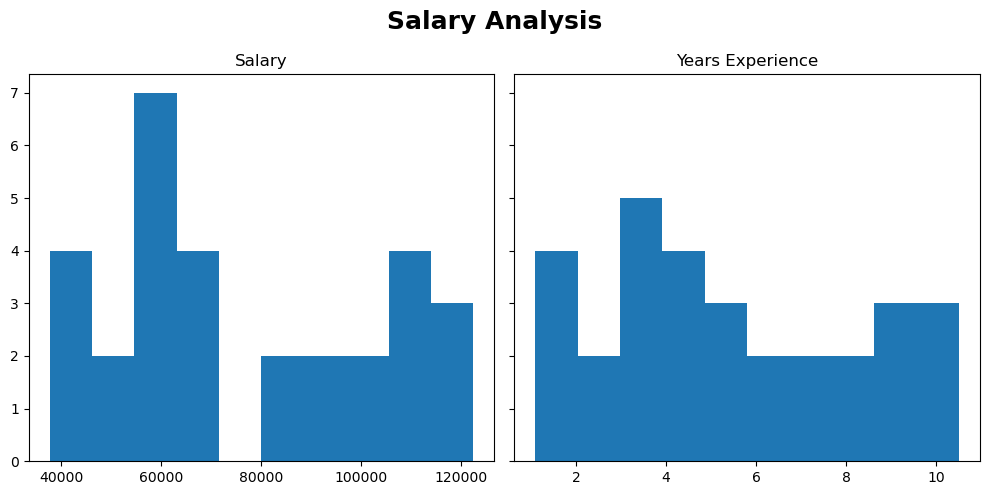

In [5]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(10,5))

axs[0].hist(df["Salary"])
axs[0].set(title="Salary")

axs[1].hist(df["YearsExperience"])
axs[1].set(title="Years Experience")

fig.suptitle("Salary Analysis", fontsize=18, fontweight="bold")

In [6]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.1 MB

### Imports

In [7]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [8]:
data = TabularDataset("/kaggle/input/salary-prediction-data-simple-linear-regression/Salary_Data.csv")

Loaded data from: /kaggle/input/salary-prediction-data-simple-linear-regression/Salary_Data.csv | Columns = 2 / 2 | Rows = 30 -> 30


In [9]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Train Test Split

In [10]:
train_size = 24 # 0.8*len(data)
seed = 42

train_data = data.sample(train_size, random_state=seed)
test_data = data.drop(train_data.index)

### Training

In [11]:
save_path = 'salary_predictors'

In [12]:
predictor = TabularPredictor(label='Salary', path=save_path)

In [13]:
predictor.fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "salary_predictors/"
AutoGluon Version:  0.7.0
Python Version:     3.10.10
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed May 31 10:45:00 UTC 2023
Train Data Rows:    24
Train Data Columns: 1
Label Column: Salary
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (122391.0, 37731.0, 77312.0, 29549.68936)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    32444.96 MB
	Train Data (Original)  Memory Usage: 0.0 MB (0.0% of available memory)
	Inferring data type of ea

In [14]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model     score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -2019.563294       0.068030  33.912405                0.000713           0.398382            2       True         12
1              CatBoost  -2463.869802       0.005720  32.462728                0.005720          32.462728            1       True          6
2        NeuralNetTorch  -3321.527891       0.005255   0.420476                0.005255           0.420476            1       True         10
3       RandomForestMSE  -4193.143509       0.056354   0.791223                0.056354           0.791223            1       True          5
4        KNeighborsDist  -5497.668202       0.001261   0.006504                0.001261           0.006504            1       True          2
5         ExtraTreesMSE  -5731.177205       0.063509   0.849275                0.06350

{'model_types': {'KNeighborsUnif': 'KNNModel',
  'KNeighborsDist': 'KNNModel',
  'LightGBMXT': 'LGBModel',
  'LightGBM': 'LGBModel',
  'RandomForestMSE': 'RFModel',
  'CatBoost': 'CatBoostModel',
  'ExtraTreesMSE': 'XTModel',
  'NeuralNetFastAI': 'NNFastAiTabularModel',
  'XGBoost': 'XGBoostModel',
  'NeuralNetTorch': 'TabularNeuralNetTorchModel',
  'LightGBMLarge': 'LGBModel',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif': -6445.512791848134,
  'KNeighborsDist': -5497.6682015899205,
  'LightGBMXT': -23194.385485882933,
  'LightGBM': -23194.385485882933,
  'RandomForestMSE': -4193.14350933853,
  'CatBoost': -2463.869801754955,
  'ExtraTreesMSE': -5731.17720548297,
  'NeuralNetFastAI': -24083.975278182075,
  'XGBoost': -7073.411250713432,
  'NeuralNetTorch': -3321.527890511302,
  'LightGBMLarge': -10943.993515437698,
  'WeightedEnsemble_L2': -2019.563293616674},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'KNeighborsUnif': 'salary_

In [15]:
predictor.get_model_best()

'WeightedEnsemble_L2'

The best result is the WeightedEnsemble_L2. This is, as the name states, not a unique model, but an ensemble consisting of the best models.

### Load Model

In [16]:
save_path = 'salary_predictors'
predictor = TabularPredictor.load(save_path)

### Validation

In [17]:
y_test = test_data["Salary"]
test_data = test_data.drop(columns=["Salary"])

In [18]:
y_pred = predictor.predict(test_data)
metrics = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: root_mean_squared_error on test data: -7371.869722787937
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -7371.869722787937,
    "mean_squared_error": -54344463.209757484,
    "mean_absolute_error": -6753.666666666667,
    "r2": 0.7835061464102864,
    "pearsonr": 0.894984584626348,
    "median_absolute_error": -6204.36328125
}


### Feature Importance

In [19]:
predictor.feature_importance(train_data)

Computing feature importance via permutation shuffling for 1 features using 24 rows with 5 shuffle sets...
	1.26s	= Expected runtime (0.25s per shuffle set)
	0.65s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
YearsExperience,43102.728438,4286.377479,0.000012,5,51928.43891,34277.017965


# Finally
As above, it's shown that the best model is WeightedEnsemble_L2.

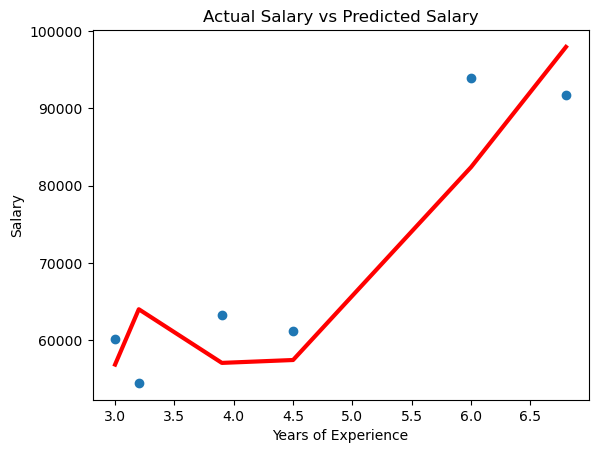

In [20]:
test_data,y_test, y_pred

plt.scatter(x=test_data,y=y_test)
plt.plot(test_data,y_pred,color="red",linewidth=3)
plt.title("Actual Salary vs Predicted Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()